----
 ####        ___Лабораторная работа №1___
#### ___📄 Градиентный спуск и его модификации___  #

----

> ___Лабораторная работа №1___           по курсу Фундаментальные концепции ИИ (ML)       
>🎓  Прозоров Евгений Иванович 109М    
>📧 eugene_ivanson@mail.ru       
>tg: @Eug_Iva           

___Описание задачи:___
Источник:  https://github.com/resi2311/AI-fundamentals#лабораторные-работы     
Градиентный спуск и его модификации           
Выбрать тестовые функции оптимизации (2 шт)    - ф-я Растригина и ф-я Матьяса       
Запрограммировать собственную реализацию классического градиентного спуска         
Запрограммировать пайлайн тестирования алгоритма оптимизации         
Визуализации функции и точки оптимума         
Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков         
Визуализации точки найденного решения (можно добавить анимацию на плюс балл)         
Запрограммировать метод вычисления градиента         
Передача функции градиента от пользователя         
Символьное вычисление градиента (например с помощью sympy) (на доп балл)         
Численная аппроксимация градиента (на доп балл)         
Запрограммировать одну моментную модификацию и протестировать ее         
Запрограммировать одну адаптивную модификацию и протестировать ее         
Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их         



In [1]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np
import math

from IPython.display import HTML

#Функция №1 - Функция Матьяса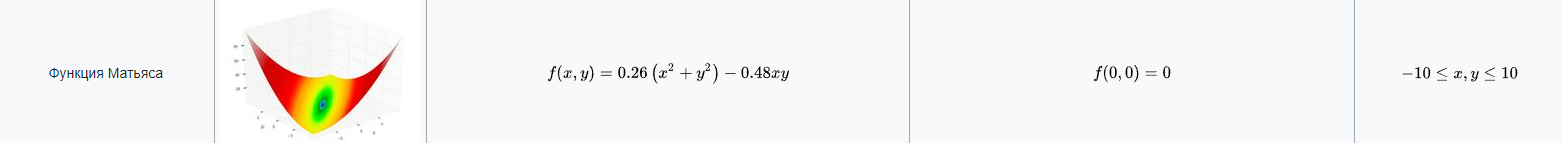

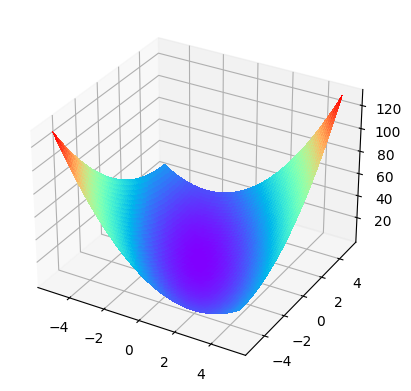

In [104]:
def func_matias(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2
    #return 0.26 * (x[0] + x[1]) ** 2 - 0.48 * x[0] * x[1]


def grad_matias(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])
    #return np.array([0.26 * (x[0] + x[1]) ** 2 - 0.48 * x[0] * x[1]])




X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)


X, Y = np.meshgrid(X, Y)
Z = func_matias(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')



# Функция №2 - Функция Растригина       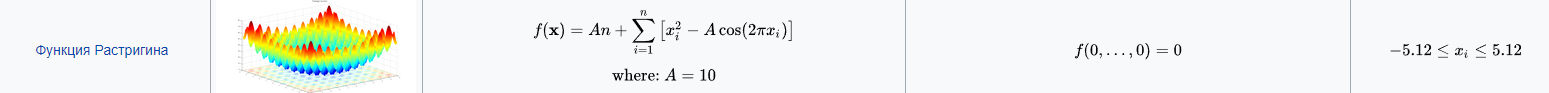

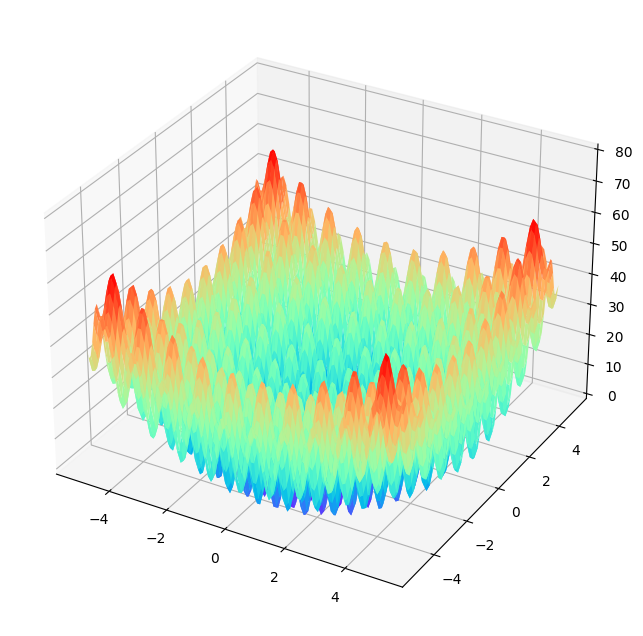

In [151]:
def rastrigin_func(x: np.ndarray) -> np.float64:
    return -x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])

def grad_three_humped_func(x: np.ndarray) -> np.ndarray:
    return np.array([np.sin(4 * np.pi * x[0]) + x[0] * 4 * np.pi * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + x[1] * 4 * np.pi * np.cos(4 * np.pi * x[1])])



X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)

X, Y = np.meshgrid(X, Y)

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y))

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=cm.rainbow, linewidth=0.08,
                antialiased=True)
ax.set_zlim(0, 80)
# plt.savefig('rastrigin_graph.png')
plt.show()


# Выполнение градиентного спуска для №1

In [106]:
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations

    Returns the minimum point, the value at that point, and the search history
    '''

    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)
    %matplotlib notebook

In [142]:
def plot_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, GD_type: Mapping = my_GD, video_name = "GD", plot_range: list = [-10, 10], z_lim: list = None):
    x1, z1, history = GD_type(f, df, x0, lr, max_iter)
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    GD_type - function of the gradient method
    video_name - the name of the file to record the operation of the method
    '''

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Plot the surface.
    X = np.arange(plot_range[0], plot_range[1], 0.01)
    Y = np.arange(plot_range[0], plot_range[1], 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = f(np.array([X, Y]))
    surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, linewidth=0, antialiased=False, alpha=0.25)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    if z_lim != None:
        ax.set_zlim(z_lim[0], z_lim[1])
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    #xx = ax.scatter(x0[0], x0[1], func_matias(x0), c = 'black')

    line, = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
    point, = ax.plot([], [], [], '*', color = 'black')

    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([x0[0]], [x0[1]])
    point.set_3d_properties([func_matias(x0)])

    def update_point(i):
        i = i + 1
        if (i == len(history)):
            return line, point
        #print(history[:2,0])
        #xx.set_data(history[i][0], history[i][1], history[i][2], c = 'black')
        # Animate line
        line.set_data(history[:i, 0], history[:i, 1])
        line.set_3d_properties(history[:i, 2])

        # Animate points
        point.set_data([history[i][0]], [history[i][1]])
        point.set_3d_properties([history[i][2]])
        return line, point

    ani = animation.FuncAnimation(fig, update_point, frames=range(len(history)),interval = 50, blit=True)

    writervideo = animation.FFMpegWriter(fps=10)
    ani.save(f'../media/{video_name}.mp4', writer=writervideo)
    return x1[0], x1[1], z1


In [143]:
def check_answer_matias(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''

    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2))
    print("Function value differece", f_val - f_answer)

In [144]:
x, f_val, history = my_GD(func_matias, grad_matias, np.array([10, 10]), max_iter = 5000)
check_answer_matias(x, f_val)

Distance to the answer point 0.07116800290254796
Function value differece 0.0019346137822891848


(-0.3174961922474784, 2.4103837799160726, 4.480982286708914)

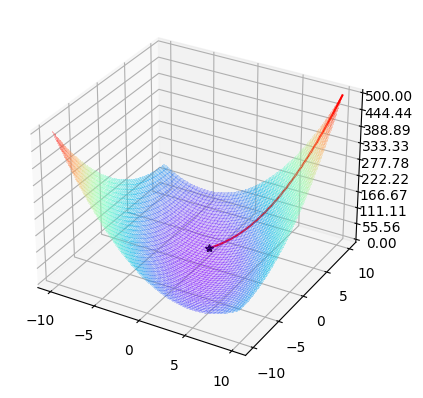

In [141]:
plot_GD(func_matias, grad_matias, np.array([10, 10]), max_iter = 500)

# Выполнение градиентного спуска для №2

In [149]:
def check_answer_rastrigin(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''

    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) )
    print("Function value differece", f_val - f_answer)

In [152]:
x, f_val, history = my_GD(rastrigin_func, grad_three_humped_func, np.array([0, 1]), max_iter = 1000)

In [153]:
check_answer_rastrigin(x, f_val)

Distance to the answer point [[37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 ...
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]]
Function value differece 0.8785916279847861


CalledProcessError: ignored

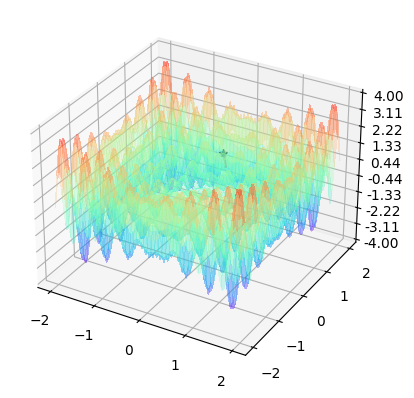

In [154]:
plot_GD(rastrigin_func, grad_three_humped_func, np.array([0, 1]), max_iter = 500, video_name = "GD_on_multi", plot_range = [-2, 2], z_lim = [-4, 4])
